In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [197]:
path = "/home/users/jolivier/oak/users/jolivier/repos/hla-assoc/"
outpath = path + "notebooks/output/AIC_analysis/"

# Find phenoteype and haplotype names

In [185]:
phe_list = []
# get names of cancer phe files

cancerphes_file = open(path + "data/cancerphes.txt", "r")
for line in cancerphes_file.readlines():
    if line[:-1] not in ["1064"]: # additive
        phe_list.append(line[:-1])
cancerphes_file.close()

# get names of HC phe files
for i in range(446):
    # after filtering there are no cases for HC65
    if i not in [29]: # additive
        phe_list.append("HC" + str(i))

In [186]:
# get haplotype names

hap_list = []

hap_file = open(path + "data/all_haps.txt","r")
for line in hap_file.readlines():
    hap_list.append(line[:-1])
hap_file.close()

# Create AIC dataframes from additive and genetic models

## Additive model dataframe

In [187]:
# initialize dataframe
add_df = pd.DataFrame(index = phe_list, columns = hap_list, dtype = float)

In [188]:
for phe in phe_list:
    add_file = open(path + "scripts/output/reg_test/reg_results/" + phe + "_rounded_add.txt","r")
    curr_allele = ""
    for line in add_file.readlines():
        if line[0] == "$":
            #print(line[1:-1])
            curr_allele = line[1:-1]
        if line[:3] == "AIC":
            #print(line[5:-1])
            add_df[curr_allele][phe] = float(line[5:-1])
            #print(add_df[curr_allele][phe])
    add_file.close()


In [198]:
add_df.to_csv(outpath + "AIC_add.csv")
add_df;

## Genetic model dataframe

In [190]:
# initialize dataframe
gen_df = pd.DataFrame(index = phe_list, columns = hap_list, dtype = float)

In [191]:
for phe in phe_list:
    gen_file = open(path + "scripts/output/reg_test/reg_results/" + phe + "_rounded_gen.txt","r")
    curr_allele = ""
    for line in gen_file.readlines():
        if line[0] == "$":
            #print(line[1:-1])
            curr_allele = line[1:-1]
        if line[:3] == "AIC":
            #print(line[5:-1])
            gen_df[curr_allele][phe] = float(line[5:-1])
            #print(add_df[curr_allele][phe])
    gen_file.close()

In [200]:
gen_df.to_csv(outpath + "AIC_gen.csv")
gen_df;

In [199]:
sub_df = add_df.subtract(gen_df);
sub_df.to_csv(outpath + "AIC_diff.csv")

In [194]:
outpath

'/home/users/jolivier/oak/users/jolivier/repos/hla-assoc/notebooks/output/AIC_analysis'

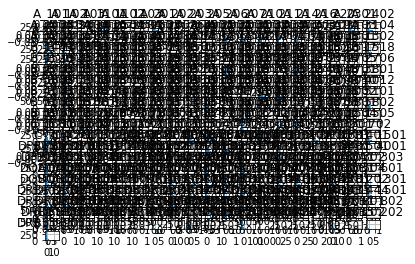

In [ ]:
s = sub_df.as_matrix().flatten()
s = s[~np.isnan(s)]
plt.hist(s)
plt.show()